In [2]:
#不显示警告
import warnings
warnings.filterwarnings('ignore')

#数据处理、数据分析
import numpy as np
import pandas as pd

#统计计算相关的工具包
import math
from scipy import stats
from scipy.stats import norm

#画图相关的工具包
import seaborn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

读取数据、展示数据

In [3]:
Basket = pd.read_csv('Basket-2018-06-01-2018-07-05.csv',encoding='gbk')  
Basket

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
5,2018-06-01,D007,3,250225,77.27
6,2018-06-01,D007,3,250309,72.07
7,2018-06-01,D007,4,47502,27.21
8,2018-06-01,D007,3,250520,11.80
9,2018-06-01,D007,1,160957,141.82


In [4]:
Basket.dtypes

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

数据清洗

缺失值处理

In [5]:
Basket.isnull().sum(axis=0)    # 查看缺失值

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

异常值处理

In [6]:
Basket['BASK_SPEND'].describe()

count    571552.000000
mean         38.973310
std         209.038276
min      -35940.000000
25%           9.000000
50%          19.900000
75%          44.700000
max       79920.000000
Name: BASK_SPEND, dtype: float64

查找BASK_SPEND值为负的记录并删除

In [7]:
Basket.BASK_SPEND[(Basket.BASK_SPEND < 0)].size

1755

In [8]:
Basket.drop(index=Basket[Basket.BASK_SPEND < 0].index, inplace=True)

重复值处理

In [9]:
print(Basket.duplicated().sum())    # 查看重复值的数量

0


查看各商店有多少笔消费

In [10]:
Basket['STORE_CODE'].value_counts()

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

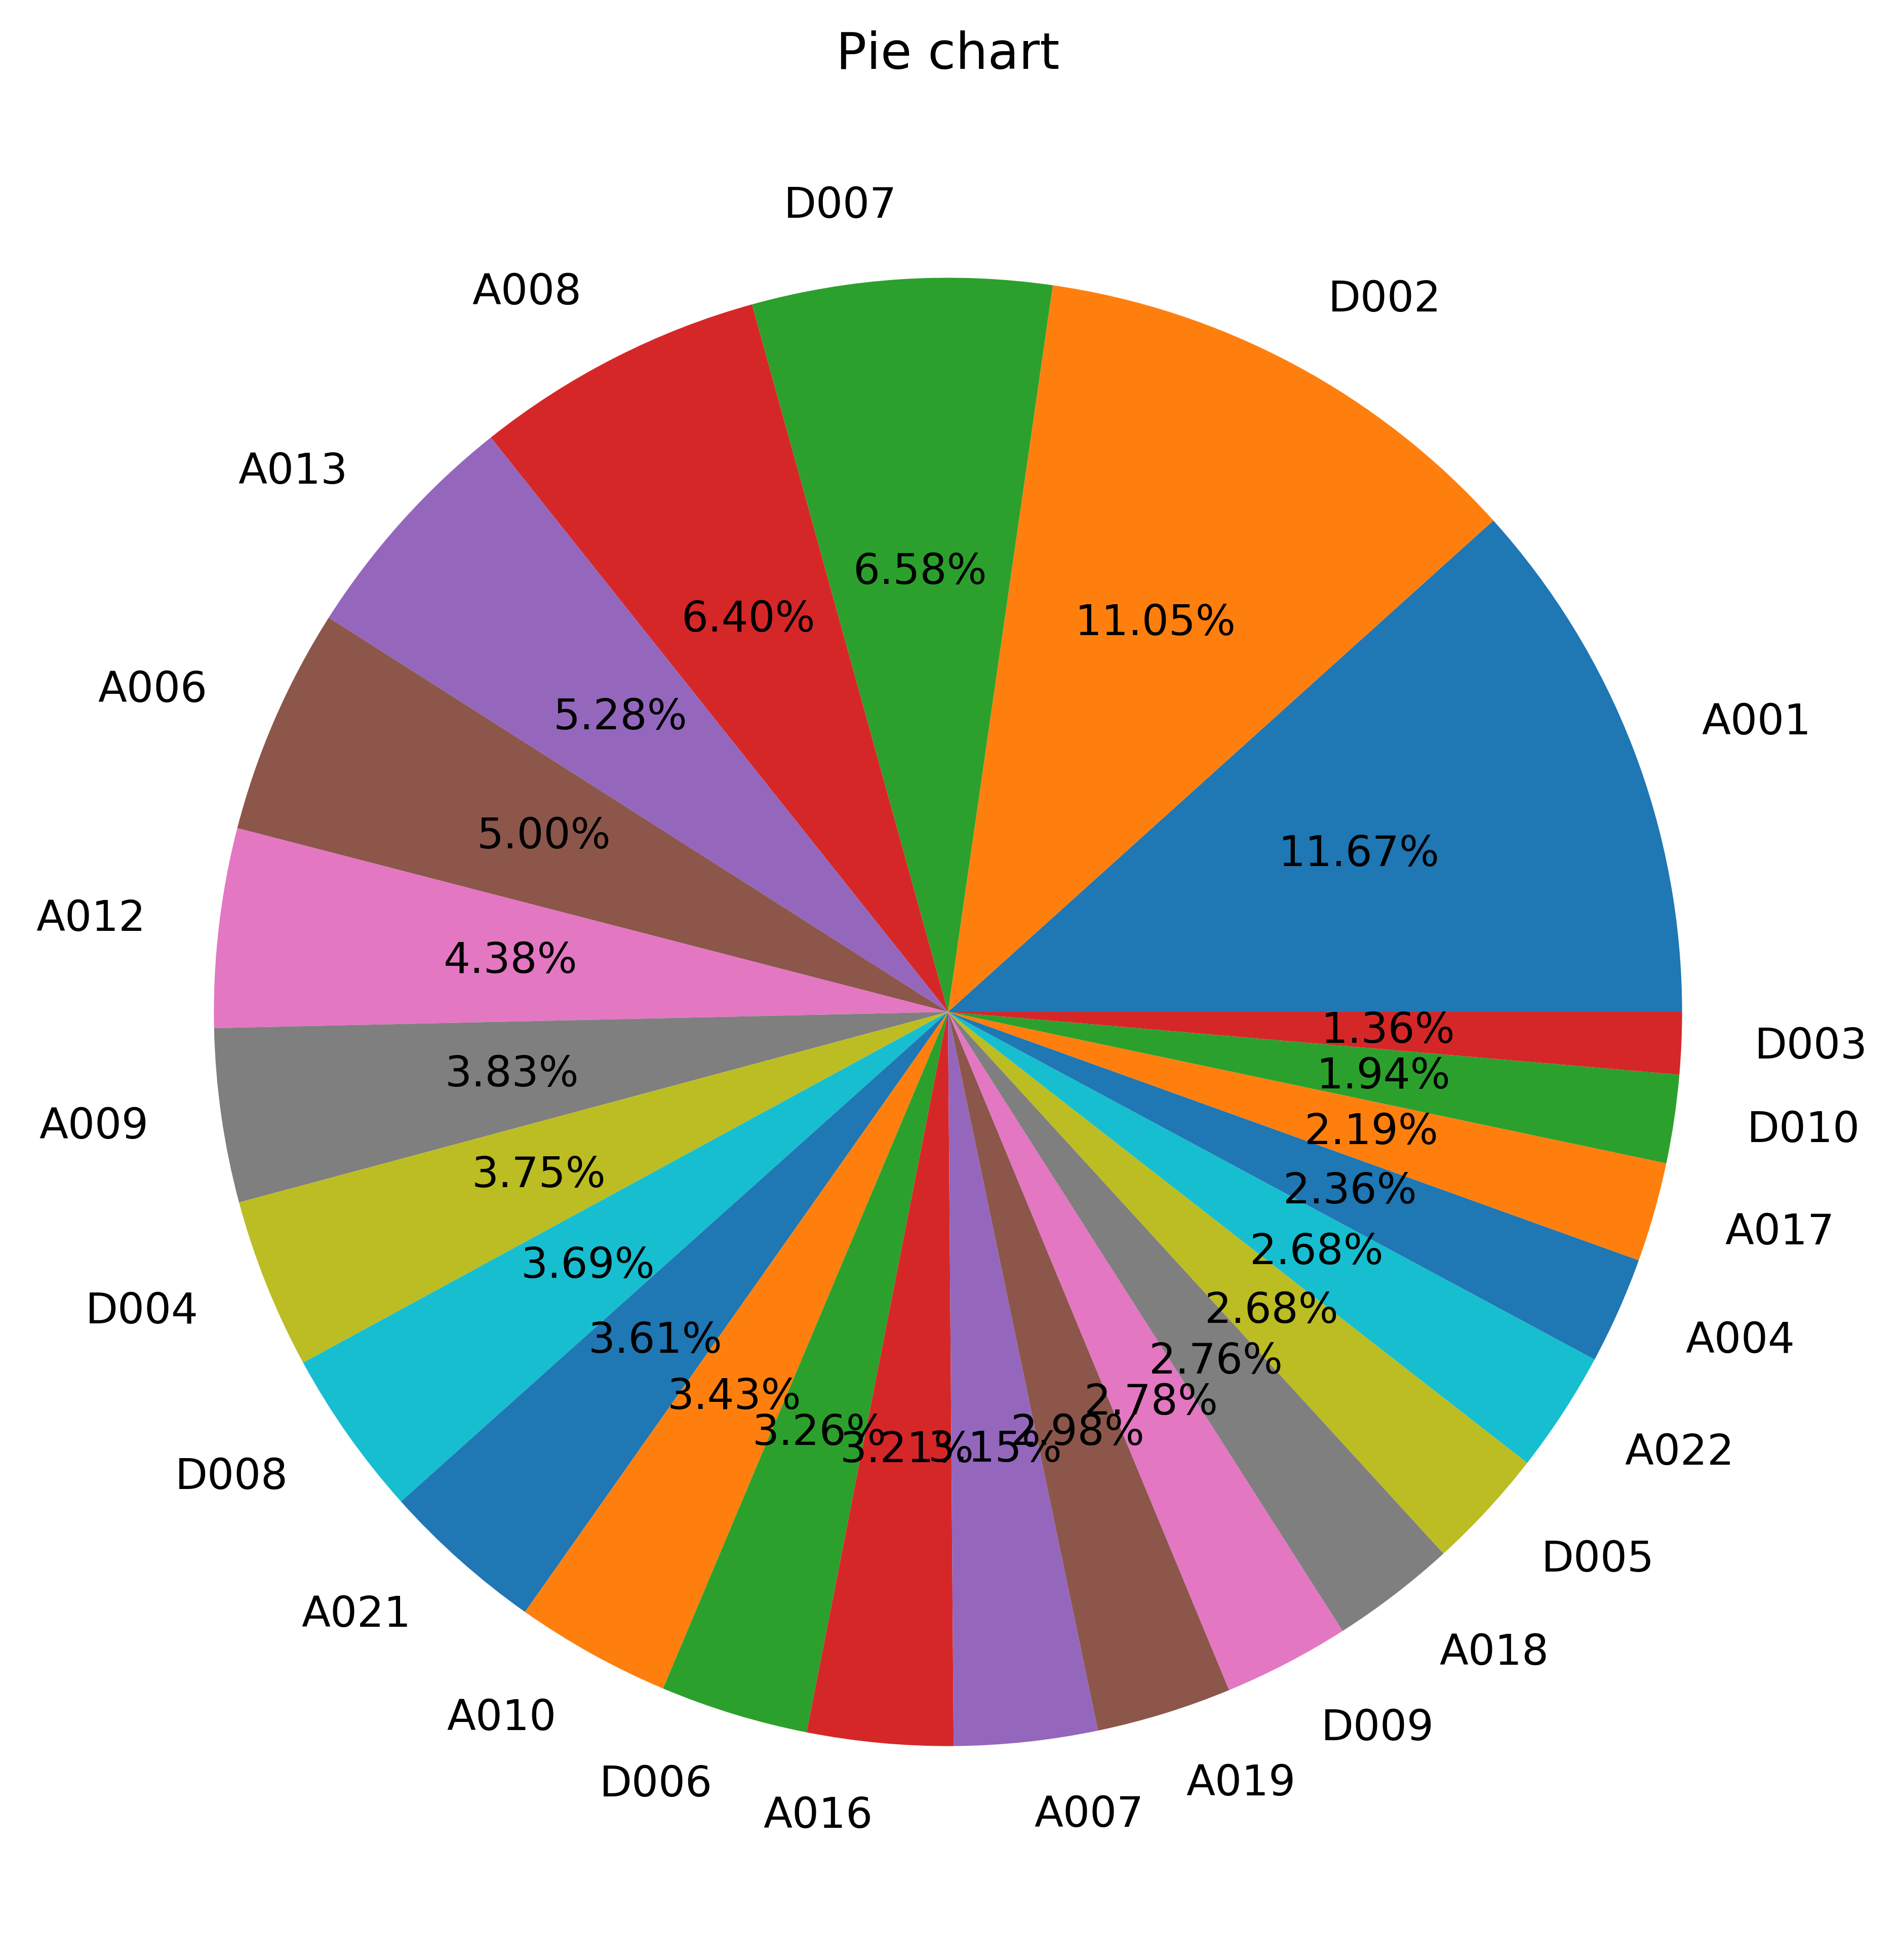

In [11]:
plt.figure(figsize=(16,8),dpi=600)#设置图片大小
labels=['A001','D002','D007','A008','A013','A006','A012','A009','D004','D008','A021','A010',
        'D006','A016','A007','A019','D009','A018','D005','A022','A004','A017','D010','D003']
X=[66507,62949,37503,36462,30064,28470,24946,21809,21362,21029,20555,19543,
   18572,18279,17954,16985,15827,15731,15261,15260,13429,12459,11070,7771]  

plt.pie(X,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Pie chart")
  
plt.show()  

查看各商店的消费总额

In [12]:
Basket.groupby('STORE_CODE')['BASK_SPEND'].sum()

STORE_CODE
A001    3.478348e+06
A004    5.156631e+05
A006    9.439233e+05
A007    6.938853e+05
A008    1.324641e+06
A009    8.052129e+05
A010    6.533729e+05
A012    8.546610e+05
A013    1.126551e+06
A016    7.491076e+05
A017    4.017670e+05
A018    5.633951e+05
A019    6.507974e+05
A021    7.497792e+05
A022    4.886462e+05
D002    3.177385e+06
D003    2.530807e+05
D004    8.153388e+05
D005    5.613868e+05
D006    8.144365e+05
D007    1.382203e+06
D008    7.128290e+05
D009    4.736292e+05
D010    3.643473e+05
Name: BASK_SPEND, dtype: float64

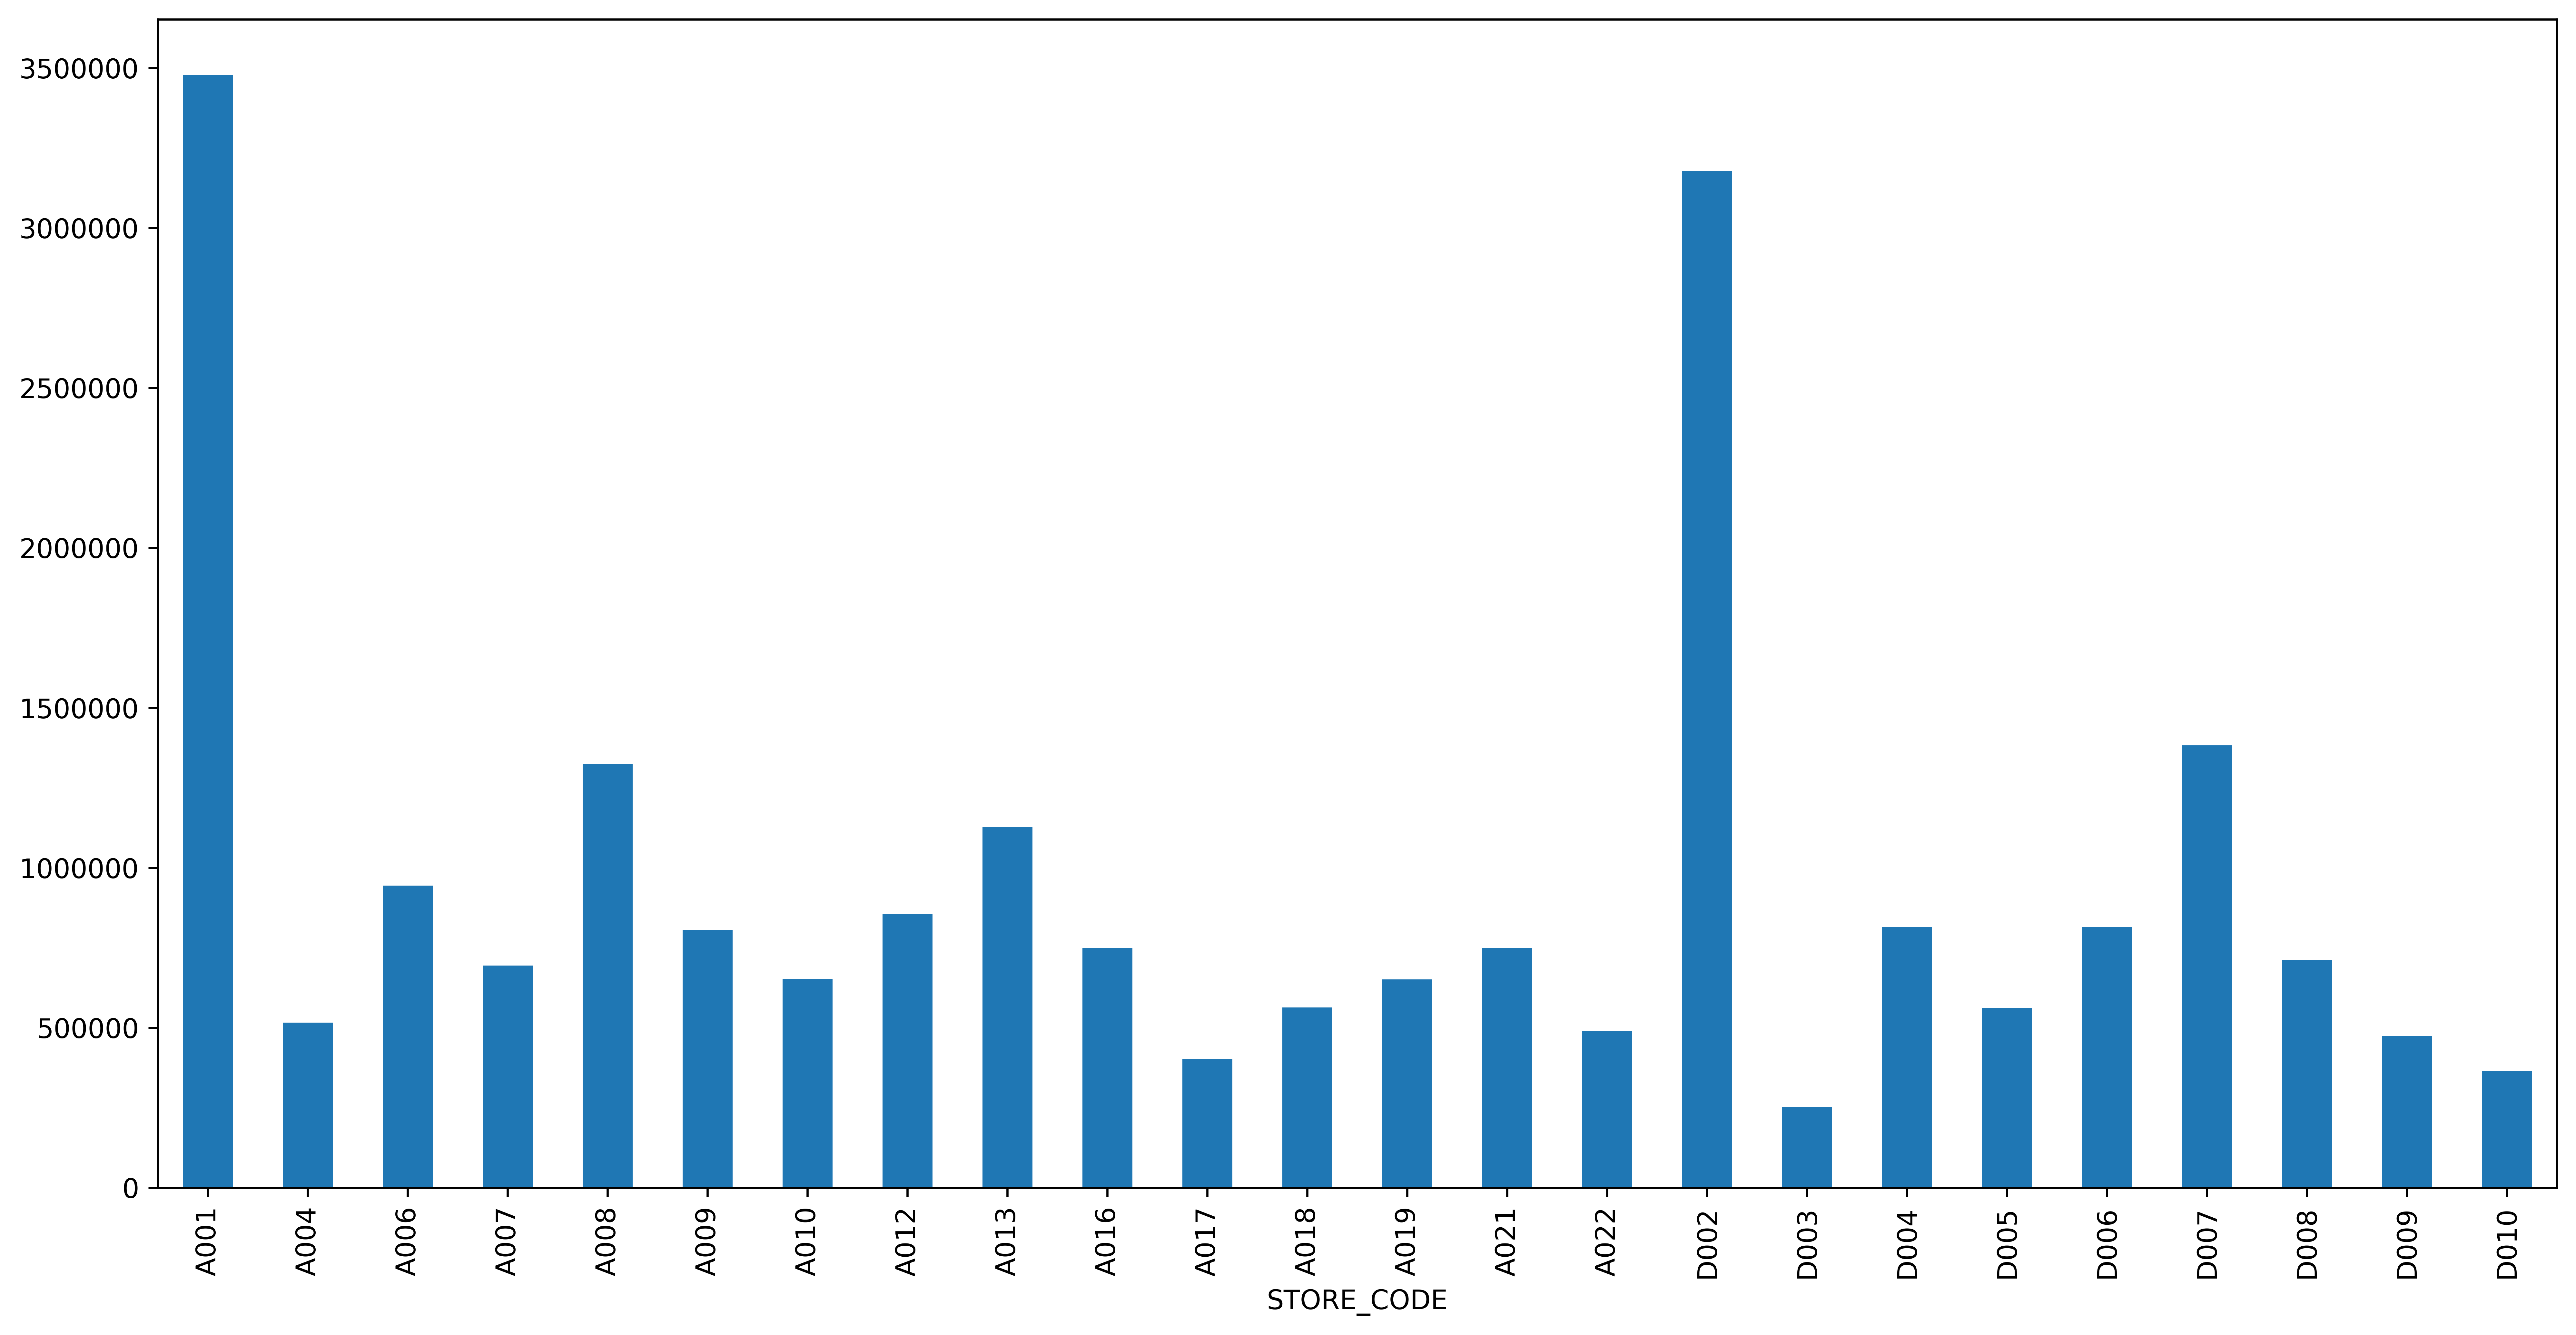

In [13]:
plt.figure(figsize=(16,8),dpi=600)#设置图片大小
(Basket.groupby('STORE_CODE')['BASK_SPEND'].sum()).plot.bar()

将采样时间内的商店消费总额降序排列

In [14]:
Basket.groupby('STORE_CODE')['BASK_SPEND'].sum().sort_values(ascending=False)

STORE_CODE
A001    3.478348e+06
D002    3.177385e+06
D007    1.382203e+06
A008    1.324641e+06
A013    1.126551e+06
A006    9.439233e+05
A012    8.546610e+05
D004    8.153388e+05
D006    8.144365e+05
A009    8.052129e+05
A021    7.497792e+05
A016    7.491076e+05
D008    7.128290e+05
A007    6.938853e+05
A010    6.533729e+05
A019    6.507974e+05
A018    5.633951e+05
D005    5.613868e+05
A004    5.156631e+05
A022    4.886462e+05
D009    4.736292e+05
A017    4.017670e+05
D010    3.643473e+05
D003    2.530807e+05
Name: BASK_SPEND, dtype: float64

查看各商店采样时间内消费金额变化

In [15]:
Basket.groupby('SHOP_DATETIME')['BASK_SPEND'].sum()

SHOP_DATETIME
2018-06-01     719667.99
2018-06-02     730030.08
2018-06-03     685279.36
2018-06-04     560063.10
2018-06-05     665581.44
2018-06-06     501199.09
2018-06-07     437448.31
2018-06-08     565651.69
2018-06-09     681885.49
2018-06-10     705195.22
2018-06-11     534259.96
2018-06-12     572481.76
2018-06-13     727913.43
2018-06-14     618915.51
2018-06-15     778783.56
2018-06-16    1174917.21
2018-06-17    1510911.65
2018-06-18    1262614.63
2018-06-19     414874.54
2018-06-20     534955.10
2018-06-21     500594.66
2018-06-22     413119.48
2018-06-23     584638.18
2018-06-24     530338.27
2018-06-25     457661.50
2018-06-26     454940.73
2018-06-27     530495.24
2018-06-28     440942.21
2018-06-29     570843.03
2018-06-30     721941.00
2018-07-01     659030.13
2018-07-02     616250.51
2018-07-03     632443.83
2018-07-04     561606.46
2018-07-05     496912.42
Name: BASK_SPEND, dtype: float64

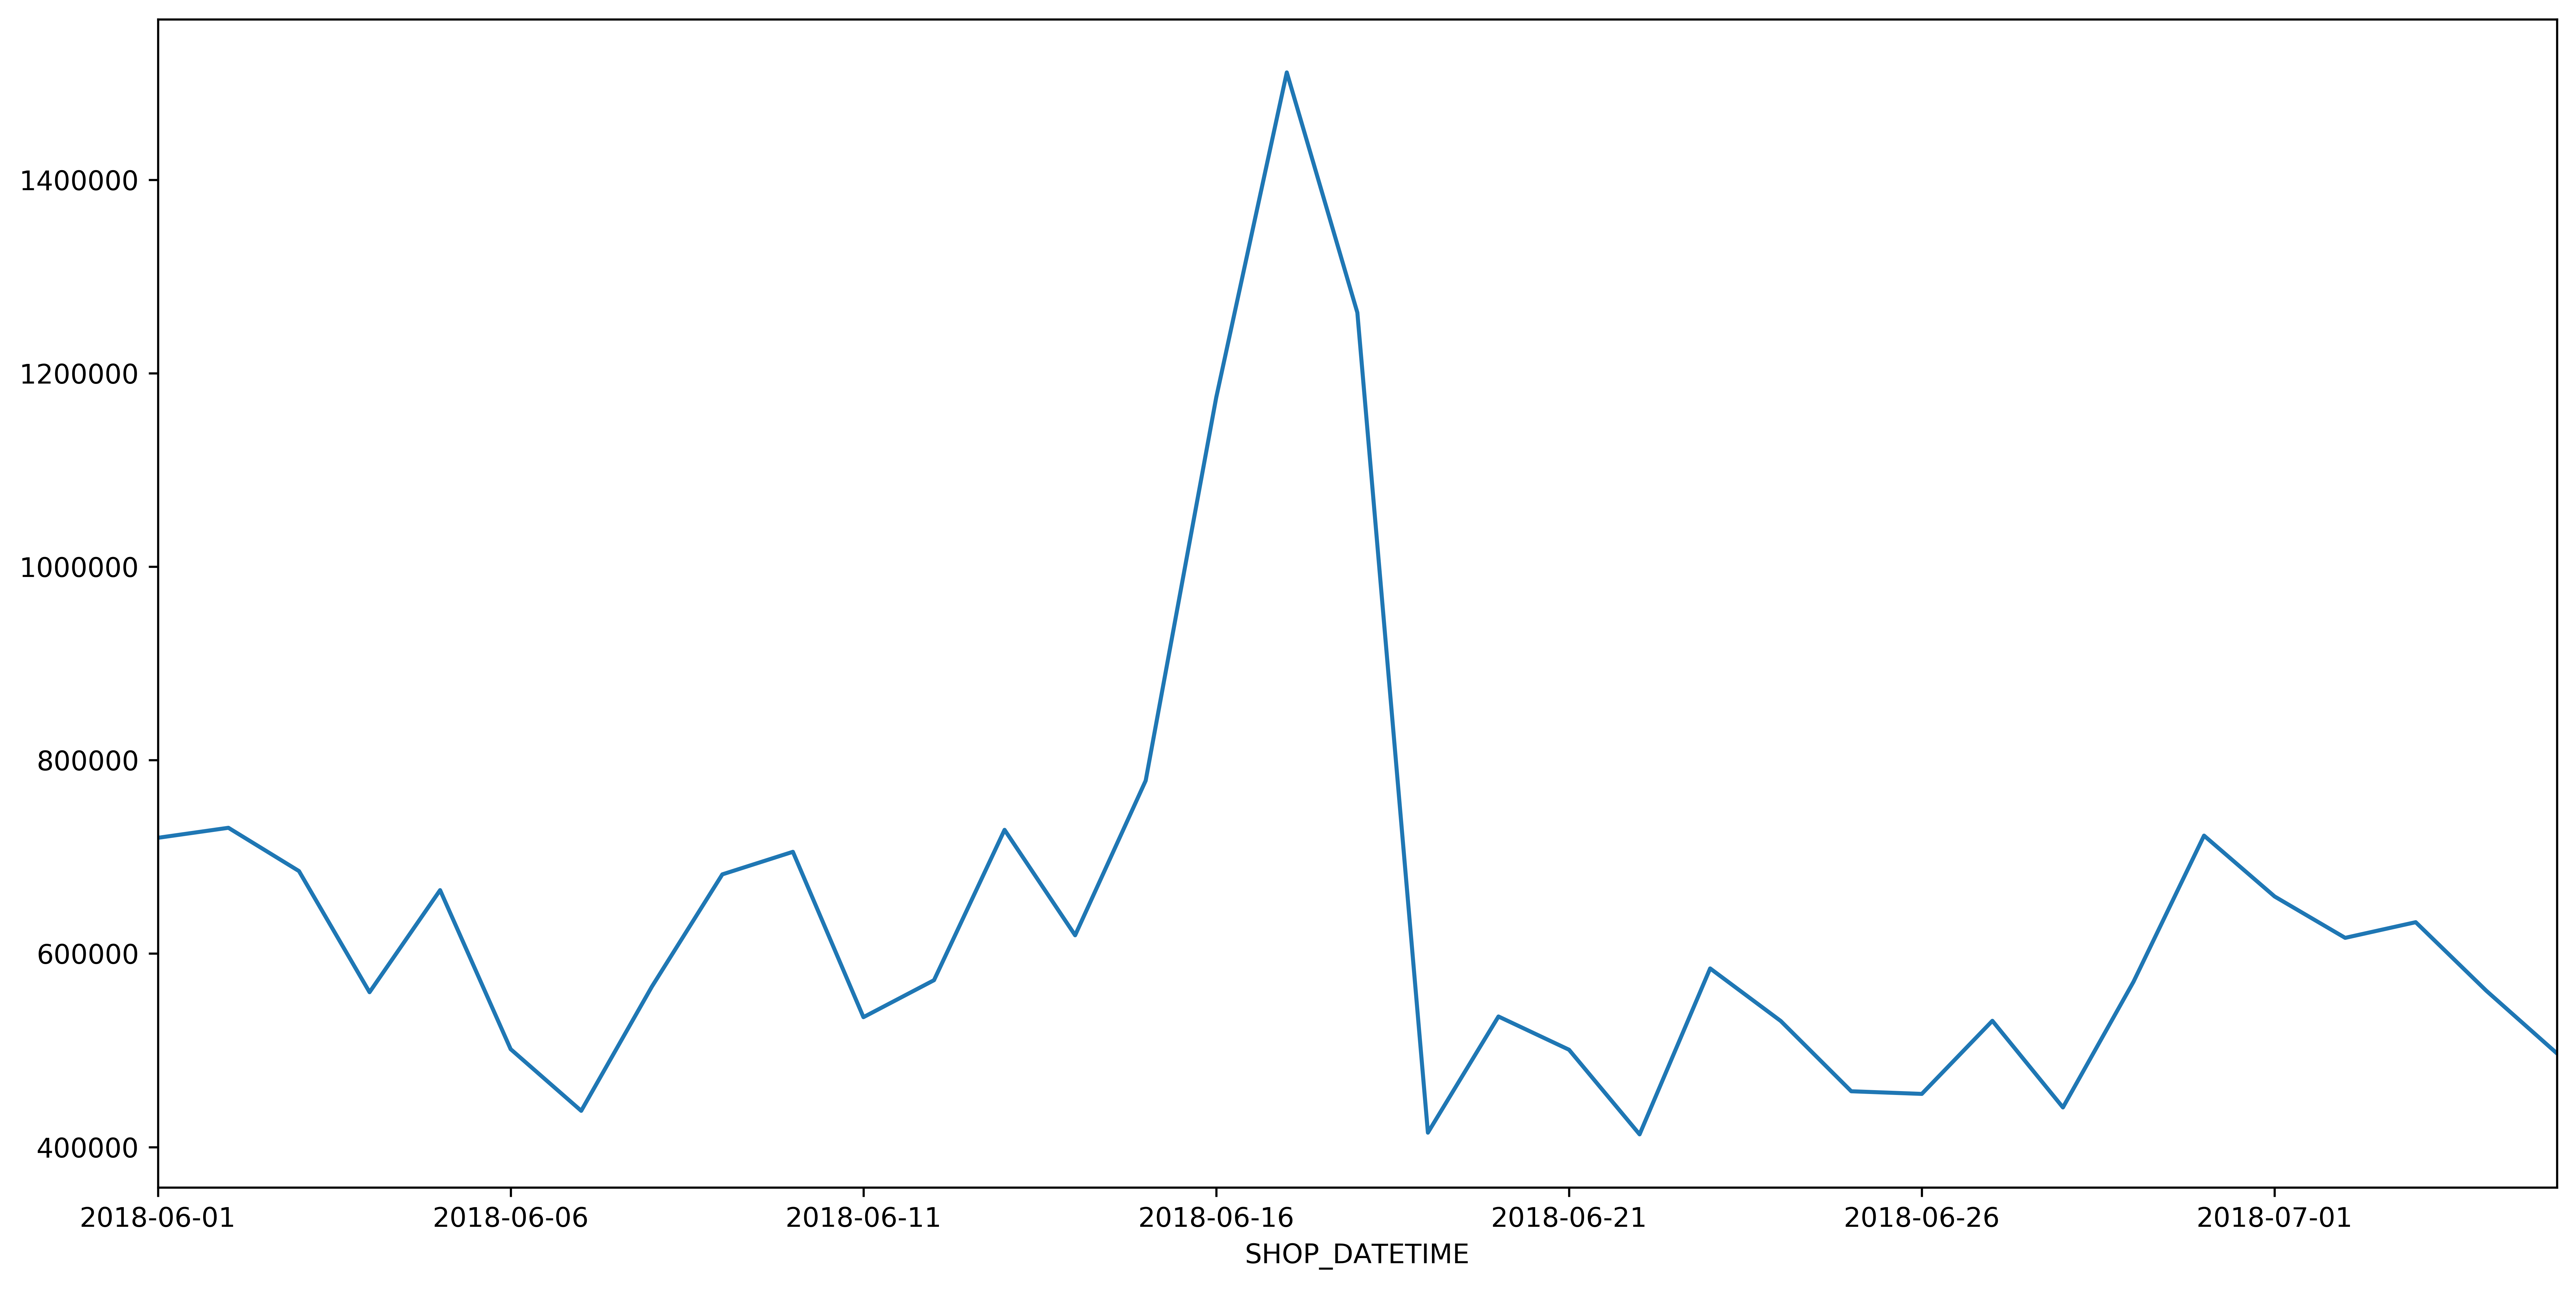

In [16]:
plt.figure(figsize=(16,8),dpi=600)#设置图片大小
(Basket.groupby('SHOP_DATETIME')['BASK_SPEND'].sum()).plot()

切片

不同商店每个采样时间内的收益

In [17]:
STORE_CODE_slice = Basket.groupby(['STORE_CODE','SHOP_DATETIME']).sum()
STORE_CODE_slice

POS_NO  BASK_CODE  BASK_SPEND
STORE_CODE SHOP_DATETIME                               
A001       2018-06-01      10738  315476397   102185.58
           2018-06-02       9800  285890287    79059.66
           2018-06-03      10268  306465154    79557.52
           2018-06-04       7901  250513708    54298.34
           2018-06-05       9165  270442737    81909.57
           2018-06-06      10510  325694932    79360.91
           2018-06-07       9406  300352842    59722.89
           2018-06-08       9172  298117384    65609.57
           2018-06-09      10751  324146302   129045.45
           2018-06-10      10802  357858655    95587.80
           2018-06-11       9722  311969022    79517.34
           2018-06-12       9505  325202495   104478.01
           2018-06-13      12720  398744345   125988.70
           2018-06-14      10567  336753852    95419.80
           2018-06-15      12641  386877337   139807.24
           2018-06-16      15270  463408849   312392.60
           2018-06-17      17525  548980093   324852.96
           2018-06-18      13802  431201026   204852.35
           2018-06-19       7865  240498784    53934.17
           2018-06-20      10368  333050506    85450.57
           2018-06-21       9605  300684933    72821.02
           2018-06-22       8056  256626259    60514.79
           2018-06-23      11227  359506294    80746.21
           2018-06-24       9924  316026939    75595.34
           2018-06-25       8957  292510927    64401.55
           2018-06-26       8354  312271355    68395.52
           2018-06-27      10340  359210941    73650.22
           2018-06-28       8449  300109332    56458.30
           2018-06-29       9644  317311282    80382.71
           2018-06-30      11094  367359549    96905.16
...                          ...        ...         ...
D010       2018-06-06        846   51853146     7412.23
           2018-06-07        684   42004093     6092.84
           2018-06-08        984   60561670     9189.23
           2018-06-09        921   56829730     8751.85
           2018-06-10        969   59927076     9771.72
           2018-06-11        768   47599862     7019.06
           2018-06-12        810   50303337     7986.64
           2018-06-13       1141   71348758    16255.41
           2018-06-14       1035   64589362     9622.02
           2018-06-15        909   56854204     9917.27
           2018-06-16        981   61490275    10749.31
           2018-06-17       1105   69454139    13944.28
           2018-06-18       1092   68784627    12506.37
           2018-06-19        603   38054793     6202.42
           2018-06-20        948   59943156     9847.85
           2018-06-21        819   51892301     7870.54
           2018-06-22        807   51230858     8705.35
           2018-06-23       1050   66794592    12218.14
           2018-06-24        987   62927003    11077.42
           2018-06-25        771   49250076     7577.53
           2018-06-26        807   51640361     6990.78
           2018-06-27        960   61557546     9806.22
           2018-06-28        927   59569270     9772.18
           2018-06-29        804   51765578     8572.54
           2018-06-30       1088   70235700    12768.15
           2018-07-01        979   63320020    10267.59
           2018-07-02        942   61030543    10447.48
           2018-07-03        640   43218432     7858.27
           2018-07-04        981   63767699     9557.36
           2018-07-05        816   53143292     9600.31

[840 rows x 3 columns]

In [18]:
STORE_CODE_slice1=STORE_CODE_slice[0:35]
STORE_CODE_slice1

POS_NO  BASK_CODE  BASK_SPEND
STORE_CODE SHOP_DATETIME                               
A001       2018-06-01      10738  315476397   102185.58
           2018-06-02       9800  285890287    79059.66
           2018-06-03      10268  306465154    79557.52
           2018-06-04       7901  250513708    54298.34
           2018-06-05       9165  270442737    81909.57
           2018-06-06      10510  325694932    79360.91
           2018-06-07       9406  300352842    59722.89
           2018-06-08       9172  298117384    65609.57
           2018-06-09      10751  324146302   129045.45
           2018-06-10      10802  357858655    95587.80
           2018-06-11       9722  311969022    79517.34
           2018-06-12       9505  325202495   104478.01
           2018-06-13      12720  398744345   125988.70
           2018-06-14      10567  336753852    95419.80
           2018-06-15      12641  386877337   139807.24
           2018-06-16      15270  463408849   312392.60
           2018-06-17      17525  548980093   324852.96
           2018-06-18      13802  431201026   204852.35
           2018-06-19       7865  240498784    53934.17
           2018-06-20      10368  333050506    85450.57
           2018-06-21       9605  300684933    72821.02
           2018-06-22       8056  256626259    60514.79
           2018-06-23      11227  359506294    80746.21
           2018-06-24       9924  316026939    75595.34
           2018-06-25       8957  292510927    64401.55
           2018-06-26       8354  312271355    68395.52
           2018-06-27      10340  359210941    73650.22
           2018-06-28       8449  300109332    56458.30
           2018-06-29       9644  317311282    80382.71
           2018-06-30      11094  367359549    96905.16
           2018-07-01      11457  382884366    89357.59
           2018-07-02       9164  291497628    94424.73
           2018-07-03       9987  326013897    73469.77
           2018-07-04       9909  330991525    74039.42
           2018-07-05       7632  244459812    64154.50

不同采样时间各个商店的收益

In [19]:
SHOP_DATETIME_slice = Basket.groupby(['SHOP_DATETIME','STORE_CODE']).sum()
SHOP_DATETIME_slice

POS_NO  BASK_CODE  BASK_SPEND
SHOP_DATETIME STORE_CODE                               
2018-06-01    A001         10738  315476397   102185.58
              A004           718   36786478    14153.55
              A006          1776  214553062    26030.72
              A007           909   53212861    17946.88
              A008          2423  197100655    30686.86
              A009           893  107982550    16410.03
              A010          1506  139428721    16307.55
              A012          1837  162651338    19891.53
              A013          3364  152603000    29014.41
              A016           550   42118998    19902.10
              A017           322   57109004     9039.41
              A018           472   69422126    19004.63
              A019           487   79839467    14995.83
              A021          1555   40786013    17749.59
              A022           857   23420683    13259.52
              D002         15447  279468954   145426.58
              D003           462   12275218     7646.82
              D004          1205   60307671    30593.02
              D005          1100  100628655    23212.26
              D006          1466   56422945    26636.53
              D007          4721  269693249    60124.05
              D008          1943   96553956    28593.47
              D009          1413   65096139    16539.43
              D010          1142   69097862    14317.64
2018-06-02    A001          9800  285890287    79059.66
              A004           796   40548191    12724.02
              A006          1876  233418473    30289.97
              A007          1147   55376411    17091.49
              A008          3112  254263687    38789.62
              A009           857  141359774    19497.12
...                          ...        ...         ...
2018-07-04    D005          1032   92069869    17295.34
              D006          1360   65165374    21153.43
              D007          2238  240517299    33298.38
              D008          1183   65695257    14548.80
              D009          1454   75705542    15079.38
              D010           981   63767699     9557.36
2018-07-05    A001          7632  244459812    64154.50
              A004           730   44547999    14025.28
              A006          1378  192097896    17824.67
              A007           730   44971685    11591.63
              A008          1755  161300383    24666.51
              A009           736   99910741    16086.34
              A010          1420  137375030    20244.00
              A012          1385  120337660    13759.16
              A013          2826  140418389    24333.38
              A016           515   45689310    20571.78
              A017           256   49510791     7561.39
              A018           628   97468472    15466.81
              A019           364   73525907    13074.81
              A021          1300   36097085    13115.71
              A022           669   23445028    11750.29
              D002          9343  234670106    79712.40
              D003           352   11014926     5102.22
              D004           507   68948602    18023.57
              D005           816   83504874    16430.37
              D006          1254   58836833    18141.82
              D007          2031  208973610    32228.11
              D008          1115   78736390    17266.90
              D009          1186   62667331    12180.46
              D010           816   53143292     9600.31

[840 rows x 3 columns]

In [20]:
SHOP_DATETIME_slice1=SHOP_DATETIME_slice[0:24]
SHOP_DATETIME_slice1

POS_NO  BASK_CODE  BASK_SPEND
SHOP_DATETIME STORE_CODE                               
2018-06-01    A001         10738  315476397   102185.58
              A004           718   36786478    14153.55
              A006          1776  214553062    26030.72
              A007           909   53212861    17946.88
              A008          2423  197100655    30686.86
              A009           893  107982550    16410.03
              A010          1506  139428721    16307.55
              A012          1837  162651338    19891.53
              A013          3364  152603000    29014.41
              A016           550   42118998    19902.10
              A017           322   57109004     9039.41
              A018           472   69422126    19004.63
              A019           487   79839467    14995.83
              A021          1555   40786013    17749.59
              A022           857   23420683    13259.52
              D002         15447  279468954   145426.58
              D003           462   12275218     7646.82
              D004          1205   60307671    30593.02
              D005          1100  100628655    23212.26
              D006          1466   56422945    26636.53
              D007          4721  269693249    60124.05
              D008          1943   96553956    28593.47
              D009          1413   65096139    16539.43
              D010          1142   69097862    14317.64

In [21]:
item = pd.read_csv('item-2018-06-01-2018-07-05.csv',encoding='gbk')  
item

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.30
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.00
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.00
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.90
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.00
5,2018-06-01,D007,1,160905,194904,3.522,35.22,10.0,n,0.00
6,2018-06-01,D007,3,250458,56371,1.000,8.00,8.0,n,0.00
7,2018-06-01,D007,3,250241,75124,12.000,30.00,2.5,n,0.00
8,2018-06-01,D007,8,5346,195988,1.000,4.90,5.8,m,-0.90
9,2018-06-01,D007,8,5346,3096,1.000,8.90,12.9,p,-4.00


In [ ]:
STORE_CODE_slice = Basket.groupby(['BASK_CODE','SHOP_DATETIME']).sum()
STORE_CODE_slice